# Question No.1. Vision Dataset

CIFAR-10-It dataset consists of 60000 32x32 colour images in 10 classes. Please find your dataset from the link-https://www.tensorflow.org/datasets/catalog/cifar10

## 1. Import Libraries/Dataset(0 mark)

In [1]:
import os
seed=21
os.environ['PYTHONHASHSEED']=str(seed)

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, datasets
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sn
import pandas as pd
import itertools
import copy
import time


In [2]:
def reset_random_seeds(seed_val):
    os.environ['PYTHONHASHSEED']=str(seed_val)
    tf.random.set_seed(seed_val)
    np.random.seed(seed_val)

In [3]:
reset_random_seeds(seed)

In [4]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)
num_classes = 10
print(num_classes)



10


In [5]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=4)

## 2. Data Visualization and augmentation(1 mark)

### a. Plot at least two samples from each class of the dataset (use matplotlib/seaborn/any other library).

In [6]:
def display_image(sample_image):
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

    plt.figure(figsize=(5,20))
    # fig, ax = plt.subplots(nrows=10, ncols=2)
    j=1
    for key, value in sample_image.items():
        for i in range(len(value)):
            plt.subplot(10, len(value), j)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(value[i]/255, cmap=plt.cm.binary)
            plt.xlabel(class_names[key])
            j+=1
    plt.show()

In [7]:
sample_image = {}

for image, label in zip(X_train, y_train):
    if label[0] in sample_image.keys() and len(sample_image[label[0]])<2:
        sample_image[label[0]].append(image)
    elif label[0] not in sample_image.keys():
        sample_image[label[0]] = [image]
    

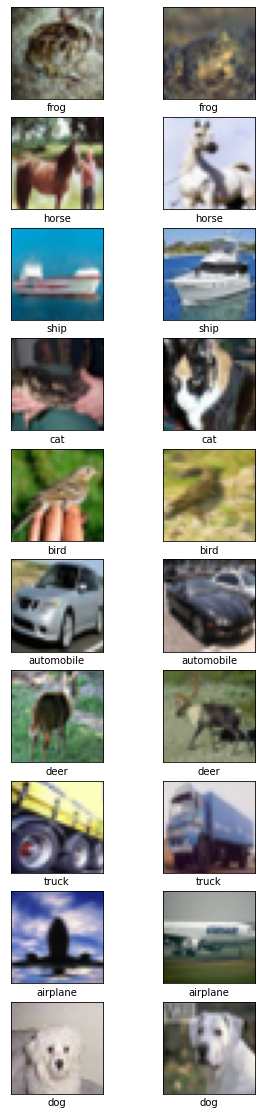

In [8]:
display_image(sample_image)

### b. Apply horizontal flip and width shift augmentation (horizontal_flip, width_shift_range) to the dataset separately. Print the augmented image and the original image for each class and each augmentation.

In [9]:
width_shift_range_gen = ImageDataGenerator(
    width_shift_range=0.1
)

In [10]:
horizontal_flip_gen = ImageDataGenerator(
    horizontal_flip=True
)

In [11]:
width_shift_range_gen.fit(X_train)
horizontal_flip_gen.fit(X_train)

In [12]:
def get_aug_img(image, gen):
    return next(gen.flow(np.array([image])))[0]
    

##############################################
      wide_shift_tange augmentation           
##############################################


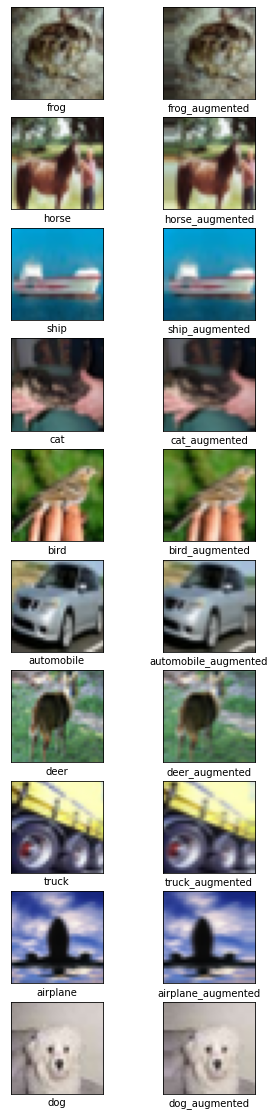

In [13]:
print("##############################################")
print("      wide_shift_tange augmentation           ")
print("##############################################")

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(5,20))
# fig, ax = plt.subplots(nrows=10, ncols=2)
j=1
for key, value in sample_image.items():
    value[1] = get_aug_img(value[0], width_shift_range_gen)
    for i in range(len(value)):
        plt.subplot(10, len(value), j)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(value[i]/255, cmap=plt.cm.binary)
        if j%2==1:
            plt.xlabel(class_names[key])
        else:
            plt.xlabel(class_names[key]+'_augmented')
        j+=1
plt.show()
      
    

##############################################
      Horizontal Flip augmentation           
##############################################


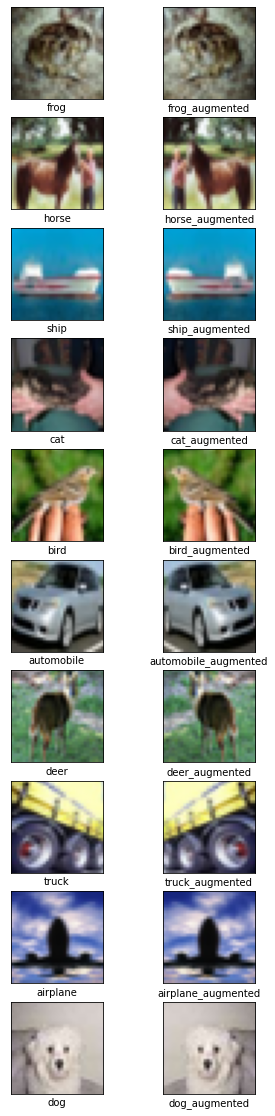

In [14]:
print("##############################################")
print("      Horizontal Flip augmentation           ")
print("##############################################")

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(5,20))
# fig, ax = plt.subplots(nrows=10, ncols=2)
j=1
for key, value in sample_image.items():
    value[1] = tf.image.flip_left_right(value[0])
    for i in range(len(value)):
        plt.subplot(10, len(value), j)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(value[i]/255, cmap=plt.cm.binary)
        if j%2==1:
            plt.xlabel(class_names[key])
        else:
            plt.xlabel(class_names[key]+'_augmented')
        j+=1
plt.show()
      
    

#### Conclusion on Data Augmentation
The purpose of data augmentation is make sure the model will be able to still recognize images with slight changes introduced in the data. This kind of brinfgs better geenralization to model as these kind of augmentation are fairly possible ones. <br><br>
The intution behind using width shift augmentation is that an object should be equally recognizable with slight shift in the image.<br><br>
The intuition behind flipping an image is that an object should be equally recognizable as its mirror image. We usually use horizontal flipping as horizontal flipping may not make sense.<br><br>
With these in mind, we will apply these augmentation but instead applying horizontal flip on all images, we will apply this randomly so that we have samples of both flipped and non-flipped data present in the dataset which will inturn help in better generalization of the model.<br><br>
We will not do random shift as

In [15]:
generator = ImageDataGenerator(
    width_shift_range=0.1,
    horizontal_flip=True,
    samplewise_std_normalization=True 
)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:356: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [16]:
generator.fit(X_train)

### c. Bring the train and test data in the required format.

In [17]:
y_train = utils.to_categorical(y_train, num_classes)
y_valid = utils.to_categorical(y_valid, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

### d. Print the shapes of train and test data.

In [18]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)

X_train shape:  (40000, 32, 32, 3)
y_train shape:  (40000, 10)


In [19]:
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_train.shape)

X_test shape:  (10000, 32, 32, 3)
y_test shape:  (40000, 10)


## 3. Model Building(0.2*5 = 1 mark)

<ol>
<li>Sequential Model layers-Use AT LEAST 3 hidden layers with appropriate input for each. Choose the best number for hidden units and give reasons.<ul><li>The total number of hidden units chosen was experimenting multiple times. We initially started using 512 unit hidden layer, and started adding new hidden layers by halving the number of neurons in each layer. We constructed the deepnet by adding new hidden layer until we reached overfitting point. Then forward we tried to prevent overfitting by varying regularization parameters and reducing the number of layers when ever necessary</li></ul></li>
<li>Add L2 regularization to all the layers.</li>
<li>Add one layer of dropout at the appropriate position and give reasons.<ul><li>The speciality of deep learning is that it minimizes the necessity for handcrafter features. This is achieved by using deep neural networks where each layer tries to learn different feature. The last layer in general tries to act as a classifier. This is the same moto behind the subject behind Respresentational learning. The penultimate leayer in general spits out the learbt feature vector which is used by the last layer to classify. In order to make sure the classifier or last layer generalizes well, we added the dropout layer after the penultimate layer. This will ensure that the features recieved by classifier will be introduced with additional noise thus helping in generalization of the last layer. In general, it is always goog to have dropout after every layer that uses non-linear activation function to prebent overfitting, but since the ask is for using only 1, we have placed it at the current position.</li></ul></li>
<li>Choose the appropriate activation function for all the layers.</li>
<li>Print the model summary.</li>
</ol>

In [20]:
nodes_per_layer = [512,256,128,64,32,16]
layers = []
batch_size = 64
dropout_rate = 0.3
num_classes = 10

In [21]:
layers.append(tf.keras.layers.Flatten(input_shape=(32,32,3)))
for nodes in nodes_per_layer:
    layers.append(tf.keras.layers.Dense(nodes, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.l2(l=0.0001))) # Using l2 regularization kernel_regularizer=tf.keras.regularizers.l2(l=0.0001)
layers.append(tf.keras.layers.Dropout(dropout_rate))
layers.append(tf.keras.layers.Dense(10, activation=tf.keras.activations.linear, kernel_regularizer=tf.keras.regularizers.l2(l=0.001)))
layers.append(tf.keras.layers.Softmax())
model1 = tf.keras.Sequential(layers)

In [22]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 16)                5

## 4. Model Compilation(0.25 mark)
<ol>
<li>Compile the model with the appropriate loss function.</li>
<li>Use an appropriate optimizer. Give reasons for the choice of learning rate and its value.<ul><li>We intially choose 0.001(least possible) and use learning rate decay to reduce it for every 10000 steps taken. This helps us converge to optimum better.</li></ul></li>
<li>Use accuracy as a metric.</li>
</ol>

In [23]:
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.96,
    staircase=True)
model1.compile(optimizer=tf.keras.optimizers.Adam(lr_schedule, amsgrad=False), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])


## 5. Model Training(0.5 + 0.25 = 0.75 mark)

### 1. Train the model for an appropriate number of epochs. Print the train and validation accuracy and loss for each epoch. Use the appropriate batch size.

In [24]:
start_time = time.time()
train_gen = generator.flow(X_train, y_train, batch_size=batch_size, shuffle=False)
valid_gen = generator.flow(X_valid, y_valid, batch_size=batch_size, shuffle=False)
overfitting_hist = model1.fit(train_gen,epochs=100,validation_data=valid_gen, callbacks=[callback])
end_time = time.time()

Epoch 1/100
625/625 [==============================] - 26s 40ms/step - loss: 2.2578 - accuracy: 0.2427 - val_loss: 1.8900 - val_accuracy: 0.3847
Epoch 2/100
625/625 [==============================] - 25s 39ms/step - loss: 1.9584 - accuracy: 0.3432 - val_loss: 1.8082 - val_accuracy: 0.4220
Epoch 3/100
625/625 [==============================] - 24s 39ms/step - loss: 1.8726 - accuracy: 0.3876 - val_loss: 1.7375 - val_accuracy: 0.4427
Epoch 4/100
625/625 [==============================] - 24s 39ms/step - loss: 1.8024 - accuracy: 0.4160 - val_loss: 1.7412 - val_accuracy: 0.4323
Epoch 5/100
625/625 [==============================] - 24s 39ms/step - loss: 1.7635 - accuracy: 0.4358 - val_loss: 1.6831 - val_accuracy: 0.4599
Epoch 6/100
625/625 [==============================] - 24s 39ms/step - loss: 1.7412 - accuracy: 0.4438 - val_loss: 1.6578 - val_accuracy: 0.4641
Epoch 7/100
625/625 [==============================] - 24s 39ms/step - loss: 1.7222 - accuracy: 0.4473 - val_loss: 1.6946 - val_ac

### 2. Plot the loss and accuracy history graphs for both train and validation set. Print the total time taken for training

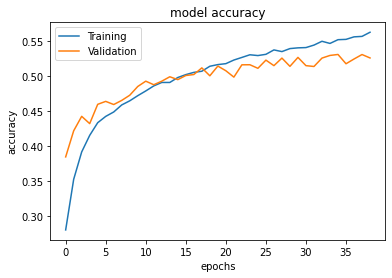

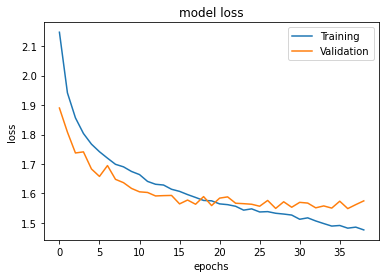

In [25]:
plt.figure()
plt.plot(overfitting_hist.history['accuracy'])
plt.plot(overfitting_hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['Training','Validation'])

plt.figure()
plt.plot(overfitting_hist.history['loss'])
plt.plot(overfitting_hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Training','Validation'])
# darker color graph is train metric and lighter color graph is validation metric

In [26]:
print("The total time taken for training: {}s".format(round(end_time - start_time, 2)))

The total time taken for training: 951.14s


## 6. Model Evaluation(0.5 + 0.5 = 1 mark)

### a. Print the final train and validation loss and accuracy. Print confusion matrix and classification report for the validation dataset. Analyse and report the best and worst performing class.
The model currently has an training accuracy of 

In [27]:
train_predicted = model1.predict(train_gen)
valid_predicted = model1.predict(valid_gen)

In [28]:
train_predicted_cls = np.argmax(train_predicted,axis=1)
valid_predicted_cls = np.argmax(valid_predicted, axis=1) 

In [29]:
train_actual_cls = np.argmax(y_train, axis=1)
valid_actual_cls = np.argmax(y_valid, axis=1)

In [30]:
print("Train Accuracy: {}%".format(round(accuracy_score(train_actual_cls, train_predicted_cls)*100.0, 2)))
print("Validation Accuracy: {}%".format(round(accuracy_score(valid_actual_cls, valid_predicted_cls)*100.0,2)))

Train Accuracy: 58.99%
Validation Accuracy: 52.8%


In [31]:
print(classification_report(valid_actual_cls, valid_predicted_cls))

              precision    recall  f1-score   support

           0       0.62      0.56      0.59      1000
           1       0.70      0.56      0.62      1000
           2       0.49      0.38      0.43      1000
           3       0.29      0.35      0.32      1000
           4       0.51      0.45      0.48      1000
           5       0.45      0.32      0.37      1000
           6       0.49      0.69      0.57      1000
           7       0.62      0.60      0.61      1000
           8       0.59      0.74      0.66      1000
           9       0.56      0.64      0.59      1000

    accuracy                           0.53     10000
   macro avg       0.53      0.53      0.52     10000
weighted avg       0.53      0.53      0.52     10000



In [32]:
cfm = confusion_matrix(valid_actual_cls, valid_predicted_cls, normalize='true')

In [33]:
df_cm = pd.DataFrame(cfm, index = class_names, columns=class_names)

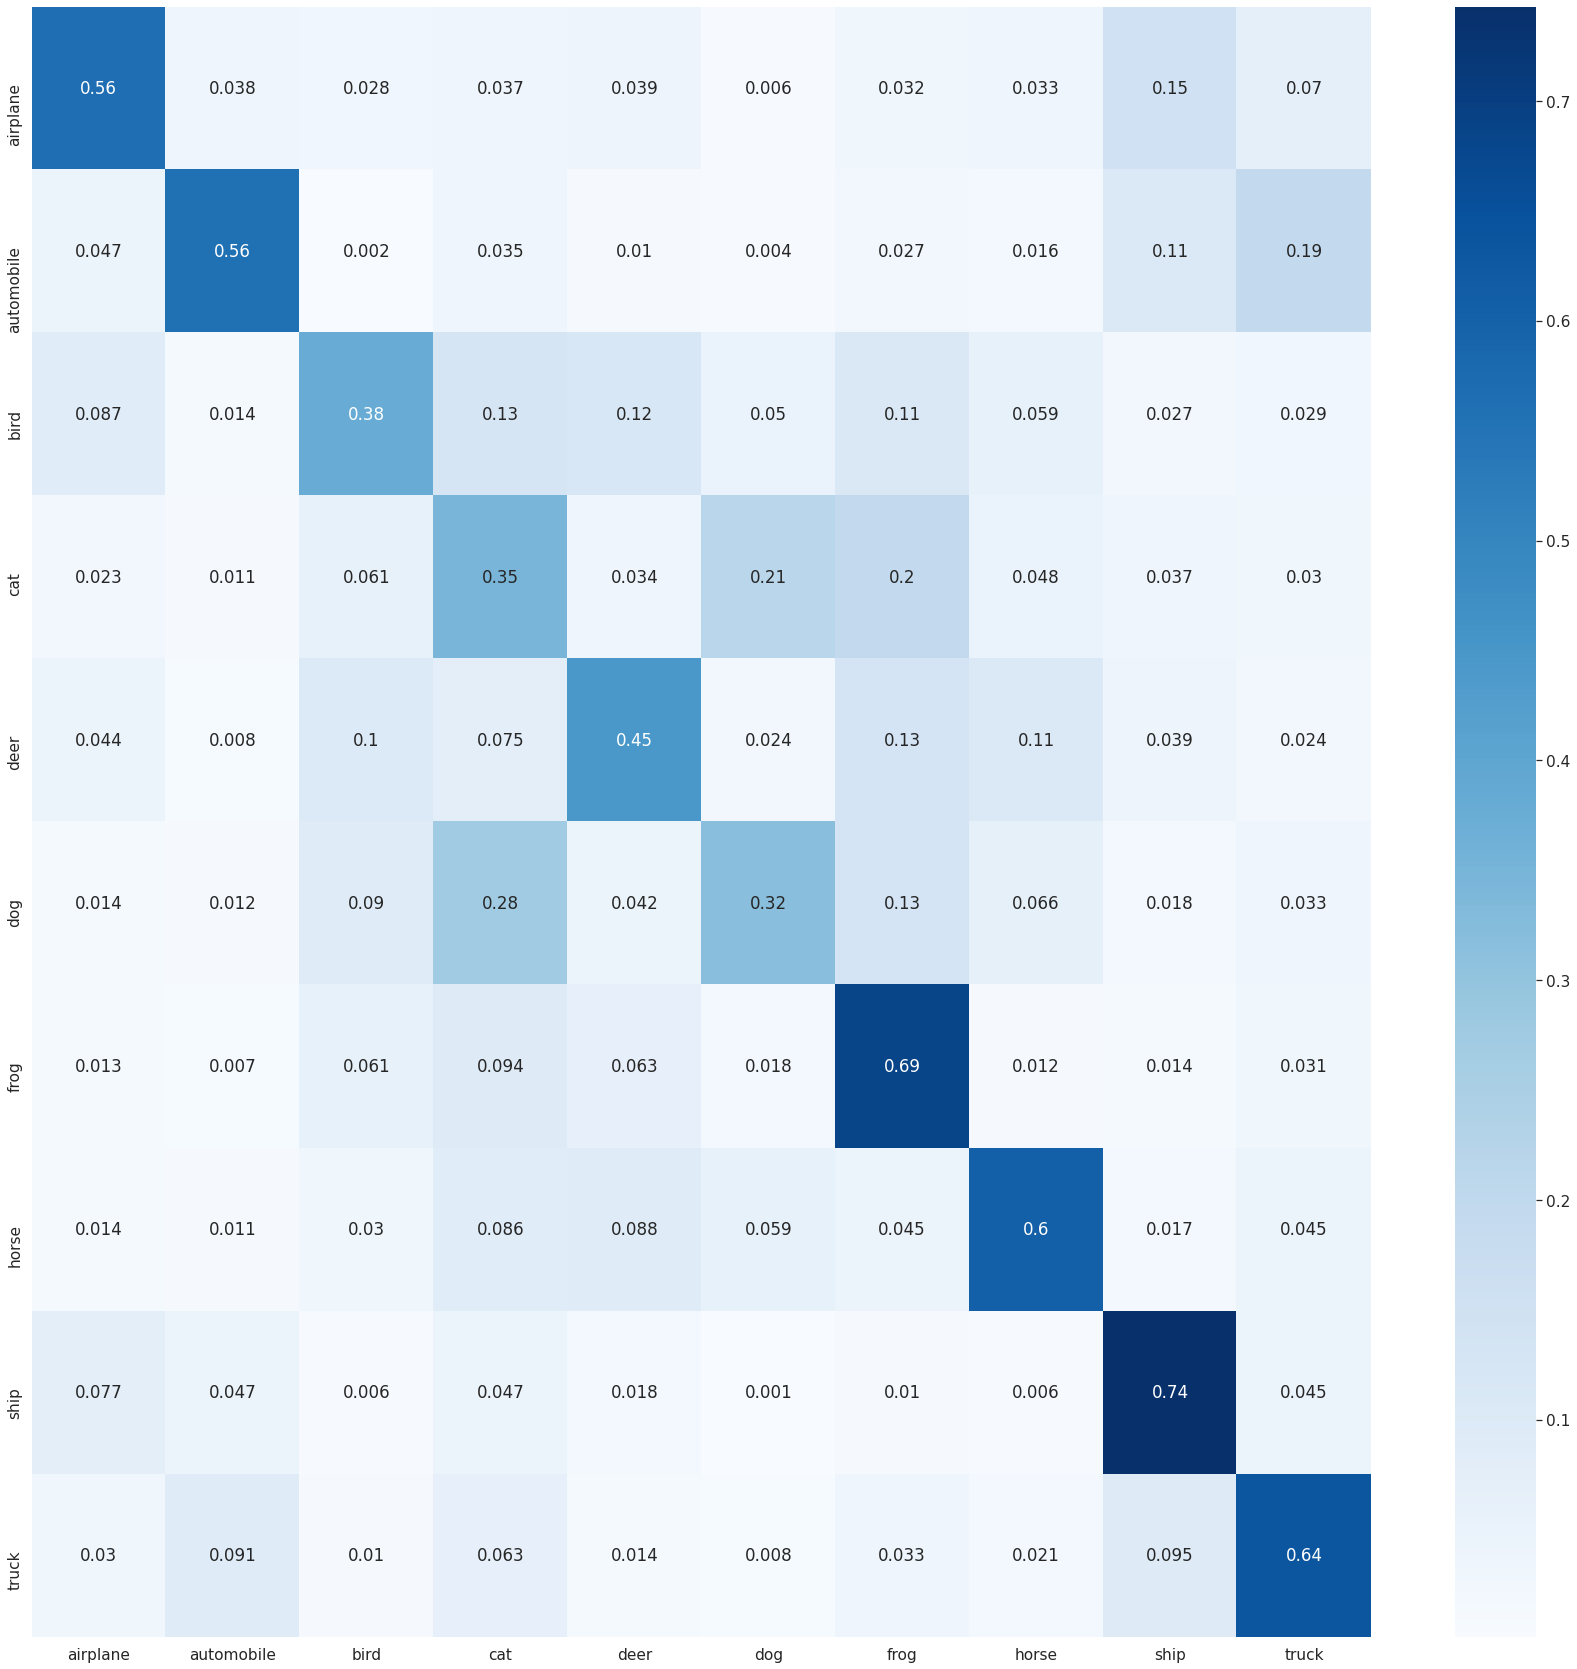

In [34]:
plt.figure(figsize=(30,30))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, cmap=plt.get_cmap('Blues')) # font size

plt.show()

### Analysis of the heatmap
The best classified class is the ship class, where amongst the ship data in validation dataset, ~74% of them were classified correctly. The worst performing class is the dog class with ~32% of cat images in validation dataset being classified correctly, ~28% of cat images are being misclassifed as dogs!

### b. Print the two most incorrectly classified images for each class in the test dataset.

In [35]:
test_gen = generator.flow(X_test, y_test, batch_size=batch_size, shuffle=False)
test_predicted = model1.predict(test_gen)
test_actual_cls = np.argmax(y_test, axis=1)

In [36]:
def find_2_smallest_index(arr):
    first = 999
    second = 999
    first_index=0
    sexond_index=0
    for i in range(len(arr)):
        if arr[i] < first:
            second = copy.deepcopy(first)
            second_index = copy.deepcopy(first_index)
            first = copy.deepcopy(arr[i])
            first_index = copy.deepcopy(i)
        elif (arr[i] < second):
            second = copy.deepcopy(arr[i])
            second_index = copy.deepcopy(i)
    return first_index, second_index
            

In [37]:
worst_2 = {}
for i in range(10):
    first_index, second_index = find_2_smallest_index(test_predicted[:,i])
    worst_2[i] = [X_test[first_index],X_test[second_index]]

#########################################################
  Printing top 2 worst classified images of each class   
#########################################################


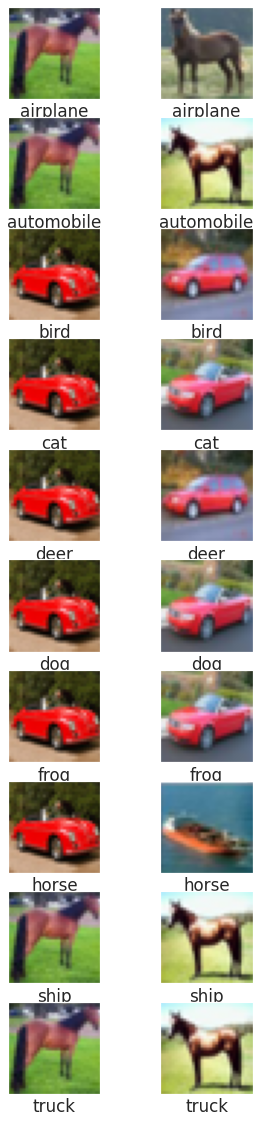

In [38]:
print("#########################################################")
print("  Printing top 2 worst classified images of each class   ")
print("#########################################################")

display_image(worst_2)

# Hyperparameter Tuning 
Build two more additional models by changing the following hyperparameters ONE at a time. Write the code for Model Building, Model Compilation, Model Training and Model Evaluation as given in the instructions above for each additional model. <strong>(1 + 1 = 2 marks)</strong>

## 1. Batch Size: Change the value of batch size in model training

We will change the batch_size parameter and run the same again. For the change we will double the batch_size and analyze what's happening

### 1. Model Building(0.2*5 = 1 mark)

<ol>
<li>Sequential Model layers-Use AT LEAST 3 hidden layers with appropriate input for each. Choose the best number for hidden units and give reasons.<ul><li>The total number of hidden units chosen was experimenting multiple times. We initially started using 512 unit hidden layer, and started adding new hidden layers by halving the number of neurons in each layer. We constructed the deepnet by adding new hidden layer until we reached overfitting point. Then forward we tried to prevent overfitting by varying regularization parameters and reducing the number of layers when ever necessary</li></ul></li>
<li>Add L2 regularization to all the layers.</li>
<li>Add one layer of dropout at the appropriate position and give reasons.<ul><li>The speciality of deep learning is that it minimizes the necessity for handcrafter features. This is achieved by using deep neural networks where each layer tries to learn different feature. The last layer in general tries to act as a classifier. This is the same moto behind the subject behind Respresentational learning. The penultimate leayer in general spits out the learbt feature vector which is used by the last layer to classify. In order to make sure the classifier or last layer generalizes well, we added the dropout layer after the penultimate layer. This will ensure that the features recieved by classifier will be introduced with additional noise thus helping in generalization of the last layer. In general, it is always goog to have dropout after every layer that uses non-linear activation function to prebent overfitting, but since the ask is for using only 1, we have placed it at the current position.</li></ul></li>
<li>Choose the appropriate activation function for all the layers.</li>
<li>Print the model summary.</li>
</ol>

In [39]:
epochs = 30
nodes_per_layer = [512,256,128,64,32,16]
layers = []
batch_size = 128 # value changed 
dropout_rate = 0.3
num_classes = 10

In [40]:
layers.append(tf.keras.layers.Flatten(input_shape=(32,32,3)))
for nodes in nodes_per_layer:
    layers.append(tf.keras.layers.Dense(nodes, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.l2(l=0.0001))) # Using l2 regularization kernel_regularizer=tf.keras.regularizers.l2(l=0.0001)
layers.append(tf.keras.layers.Dropout(dropout_rate))
layers.append(tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax, kernel_regularizer=tf.keras.regularizers.l2(l=0.001)))
model2 = tf.keras.Sequential(layers)

In [41]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_12 (Dense)             (None, 16)               

### 2. Model Compilation(0.25 mark)
<ol>
<li>Compile the model with the appropriate loss function.</li>
<li>Use an appropriate optimizer. Give reasons for the choice of learning rate and its value.<ul><li>We intially choose 0.001(least possible) and use learning rate decay to reduce it for every 10000 steps taken. This helps us converge to optimum better.</li></ul></li>
<li>Use accuracy as a metric.</li>
</ol>

In [42]:
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.96,
    staircase=True)
model2.compile(optimizer=tf.keras.optimizers.Adam(lr_schedule), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])


### 3. Model Training(0.5 + 0.25 = 0.75 mark)

#### 1. Train the model for an appropriate number of epochs. Print the train and validation accuracy and loss for each epoch. Use the appropriate batch size.

In [43]:
start_time = time.time()
train_gen = generator.flow(X_train, y_train, batch_size=batch_size, shuffle=False)
valid_gen = generator.flow(X_valid, y_valid, batch_size=batch_size, shuffle=False)
overfitting_hist = model2.fit(train_gen,epochs=100,validation_data=valid_gen, shuffle=False, callbacks=[callback])
end_time = time.time()

Epoch 1/100
313/313 [==============================] - 24s 76ms/step - loss: 2.2942 - accuracy: 0.2203 - val_loss: 1.9906 - val_accuracy: 0.3520
Epoch 2/100
313/313 [==============================] - 23s 75ms/step - loss: 2.0323 - accuracy: 0.3265 - val_loss: 1.8229 - val_accuracy: 0.4024
Epoch 3/100
313/313 [==============================] - 23s 75ms/step - loss: 1.9072 - accuracy: 0.3658 - val_loss: 1.7731 - val_accuracy: 0.4209
Epoch 4/100
313/313 [==============================] - 23s 74ms/step - loss: 1.8299 - accuracy: 0.3955 - val_loss: 1.7123 - val_accuracy: 0.4455
Epoch 5/100
313/313 [==============================] - 23s 75ms/step - loss: 1.7806 - accuracy: 0.4197 - val_loss: 1.6914 - val_accuracy: 0.4588
Epoch 6/100
313/313 [==============================] - 23s 75ms/step - loss: 1.7459 - accuracy: 0.4352 - val_loss: 1.6550 - val_accuracy: 0.4683
Epoch 7/100
313/313 [==============================] - 23s 75ms/step - loss: 1.7127 - accuracy: 0.4488 - val_loss: 1.6405 - val_ac

#### 2. Plot the loss and accuracy history graphs for both train and validation set. Print the total time taken for training

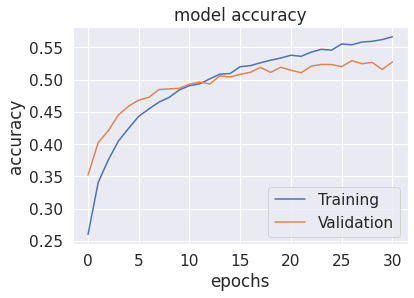

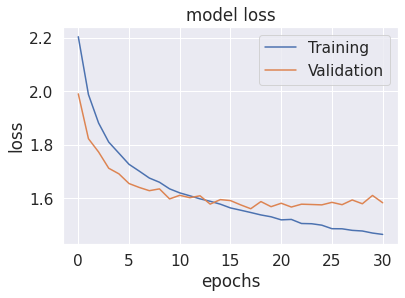

In [44]:
plt.figure()
plt.plot(overfitting_hist.history['accuracy'])
plt.plot(overfitting_hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['Training','Validation'])

plt.figure()
plt.plot(overfitting_hist.history['loss'])
plt.plot(overfitting_hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Training','Validation'])
# darker color graph is train metric and lighter color graph is validation metric

In [45]:
print("The total time taken for training: {}s".format(round(end_time - start_time, 2)))

The total time taken for training: 726.89s


### 4. Model Evaluation(0.5 + 0.5 = 1 mark)

#### a. Print the final train and validation loss and accuracy. Print confusion matrix and classification report for the validation dataset. Analyse and report the best and worst performing class.

In [46]:
train_predicted = model2.predict(train_gen)
valid_predicted = model2.predict(valid_gen)

In [47]:
train_predicted_cls = np.argmax(train_predicted,axis=1)
valid_predicted_cls = np.argmax(valid_predicted, axis=1) 

In [48]:
train_actual_cls = np.argmax(y_train, axis=1)
valid_actual_cls = np.argmax(y_valid, axis=1)

In [49]:
print("Train Accuracy: {}%".format(round(accuracy_score(train_actual_cls, train_predicted_cls)*100.0, 2)))
print("Validation Accuracy: {}%".format(round(accuracy_score(valid_actual_cls, valid_predicted_cls)*100.0,2)))

Train Accuracy: 59.91%
Validation Accuracy: 52.4%


In [50]:
print(classification_report(valid_actual_cls, valid_predicted_cls))

              precision    recall  f1-score   support

           0       0.59      0.60      0.59      1000
           1       0.68      0.56      0.61      1000
           2       0.47      0.38      0.42      1000
           3       0.32      0.43      0.36      1000
           4       0.49      0.41      0.44      1000
           5       0.41      0.37      0.39      1000
           6       0.59      0.57      0.58      1000
           7       0.59      0.60      0.59      1000
           8       0.62      0.71      0.66      1000
           9       0.54      0.62      0.58      1000

    accuracy                           0.52     10000
   macro avg       0.53      0.52      0.52     10000
weighted avg       0.53      0.52      0.52     10000



In [51]:
cfm = confusion_matrix(valid_actual_cls, valid_predicted_cls, normalize='true')

In [52]:
df_cm = pd.DataFrame(cfm, index = class_names, columns=class_names)

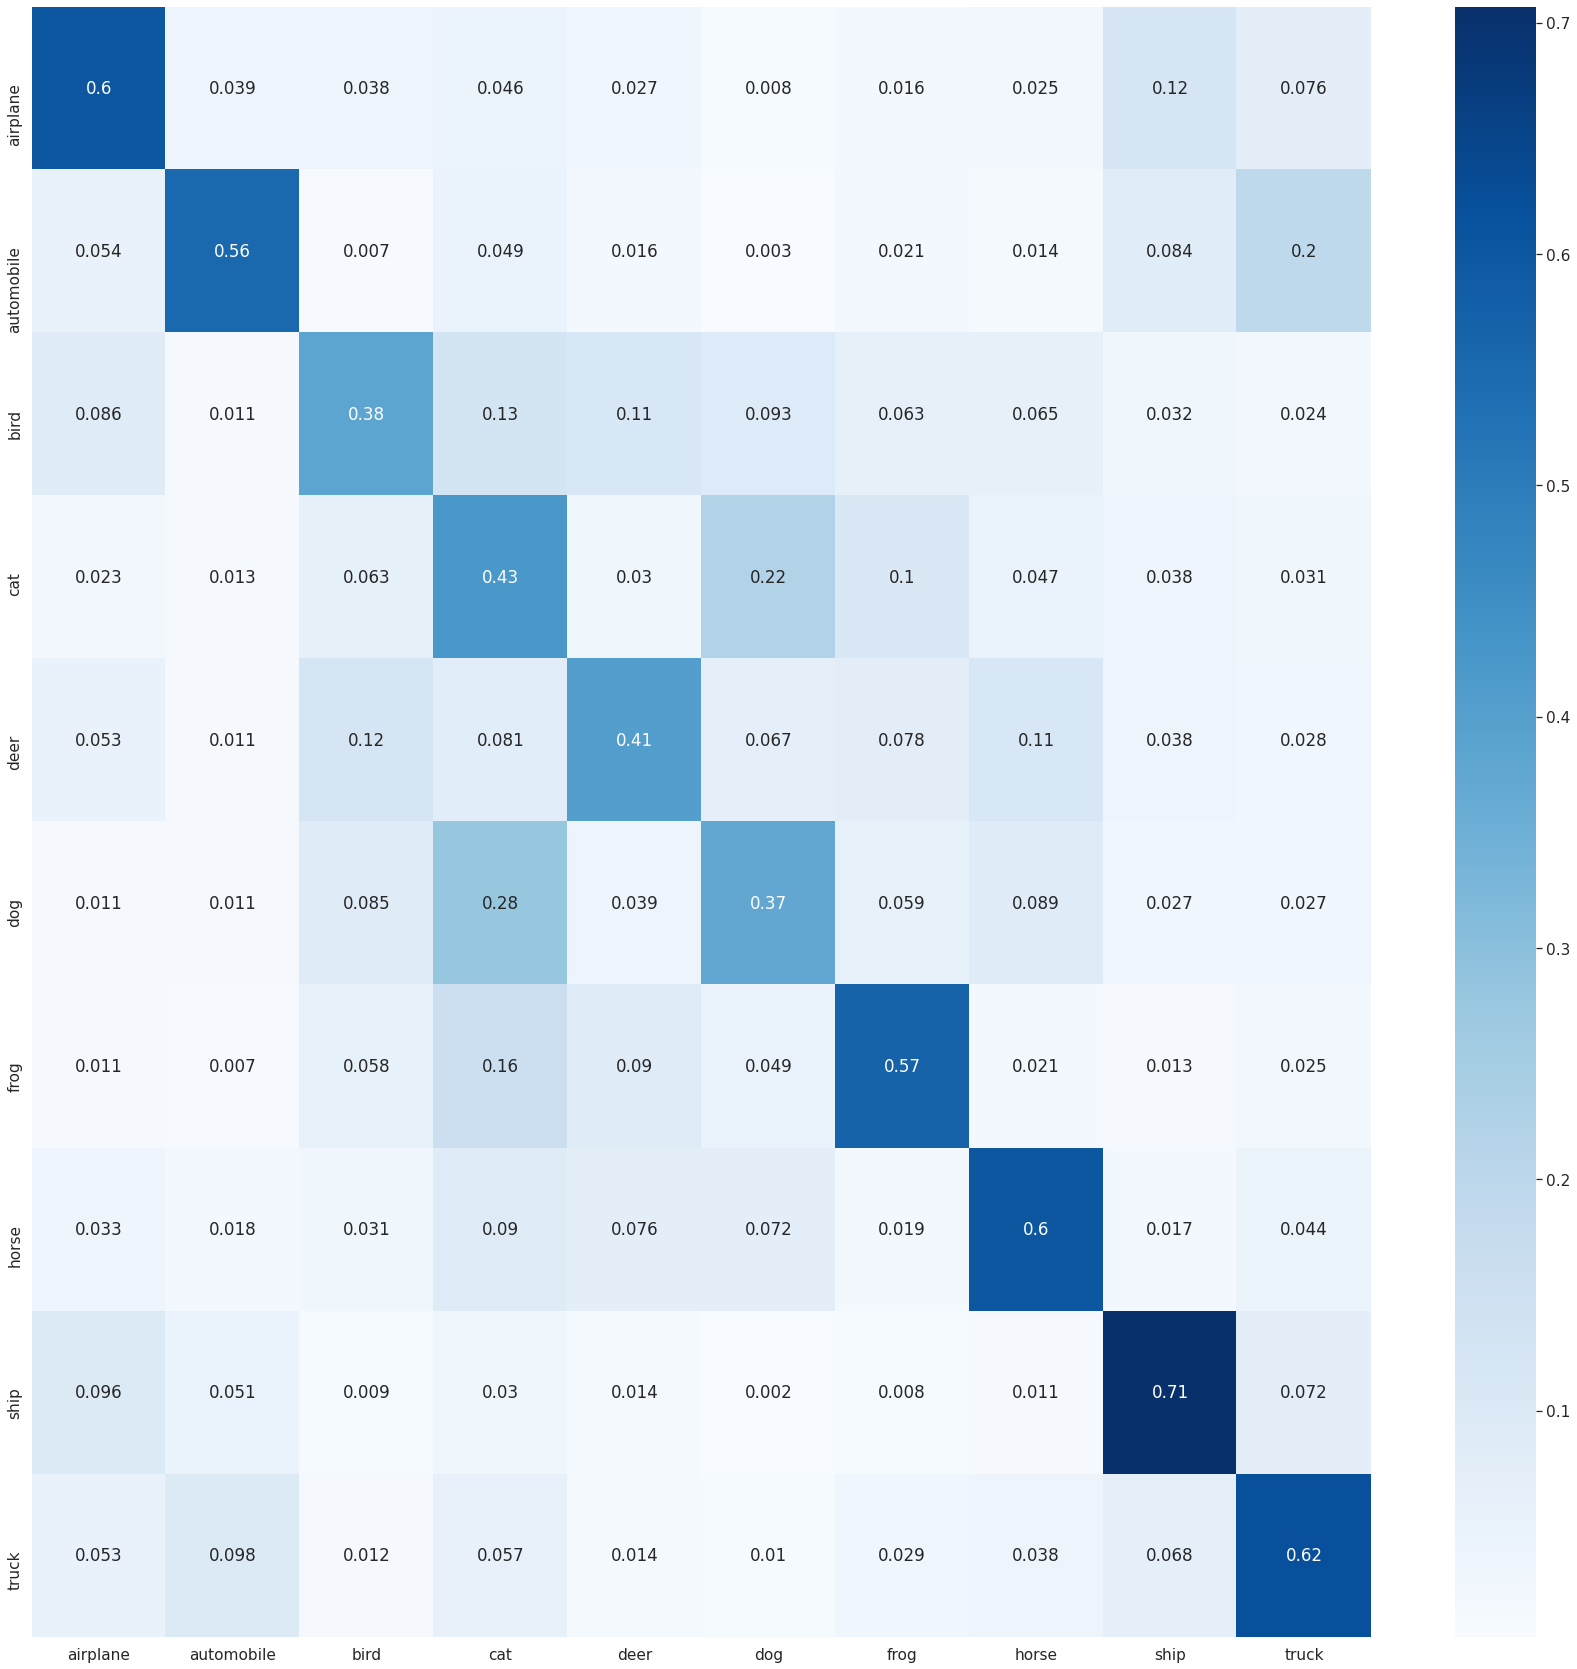

In [53]:
plt.figure(figsize=(30,30))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, cmap=plt.get_cmap('Blues')) # font size

plt.show()

### Analysis of Heatmap
For the validation dataset, amongst the classes, model has learnt to classify automobile better than other classes as it could identify ~71% of ship data in validation set, the next best is truck. The worst classified class is dog, amongst the dog images present in validation set, it has properly classified only ~37% of them. It has classified ~28% of dogs as cats which is totally wrong! 

#### b. Print the two most incorrectly classified images for each class in the test dataset.

In [54]:
test_gen = generator.flow(X_test, y_test, batch_size=batch_size, shuffle=False)
test_predicted = model2.predict(test_gen)
test_actual_cls = np.argmax(y_test, axis=1)

In [55]:
def find_2_smallest_index(arr):
    first = 999
    second = 999
    first_index=0
    sexond_index=0
    for i in range(len(arr)):
        if arr[i] < first:
            second = copy.deepcopy(first)
            second_index = copy.deepcopy(first_index)
            first = copy.deepcopy(arr[i])
            first_index = copy.deepcopy(i)
        elif (arr[i] < second):
            second = copy.deepcopy(arr[i])
            second_index = copy.deepcopy(i)
    return first_index, second_index
            

In [56]:
worst_2 = {}
for i in range(10):
    first_index, second_index = find_2_smallest_index(test_predicted[:,i])
    worst_2[i] = [X_test[first_index],X_test[second_index]]

#########################################################
  Printing top 2 worst classified images of each class   
#########################################################


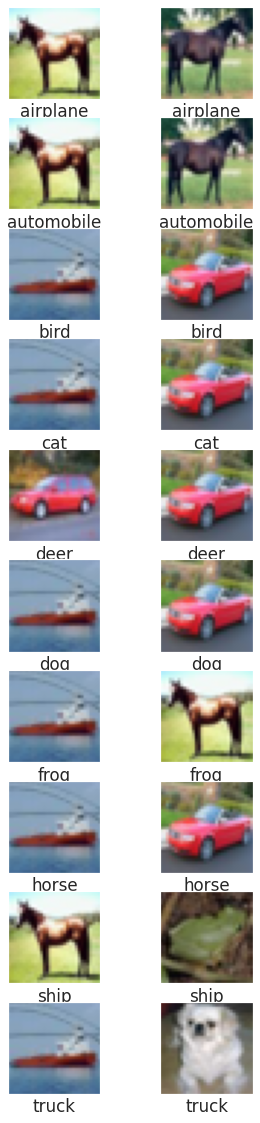

In [57]:
print("#########################################################")
print("  Printing top 2 worst classified images of each class   ")
print("#########################################################")

display_image(worst_2)

# Analysis on how much the performance was affected by changing batch_size
We can see that as we doubled the batch size, the model is converging faster. The time taken to reach the previous levels was more quicker. But since we kept everything else same, we need to change the learning rate appropriatly as well as the the parameters for learning rate decay to converge better and faster! There's not much difference in accuracy but the training process was more quicker!


## 2. Dropout: Change the position and value of dropout layer

We will change the position of the droput layer to just after the flatten layer to introduce noice in data and analyze model behavior and also reduce the dropout rate value as we want lesser noise in the data

### 1. Model Building(0.2*5 = 1 mark)

<ol>
<li>Sequential Model layers-Use AT LEAST 3 hidden layers with appropriate input for each. Choose the best number for hidden units and give reasons.</li>
<li>Add L2 regularization to all the layers.</li>
<li>Add one layer of dropout at the appropriate position and give reasons.</li>
<li>Choose the appropriate activation function for all the layers.</li>
<li>Print the model summary.</li>
</ol>

In [58]:
epochs = 30
nodes_per_layer = [512,256,128,64,32,16]
layers = []
batch_size = 64
dropout_rate = 0.2 # new change
num_classes = 10

In [59]:
layers.append(tf.keras.layers.Flatten(input_shape=(32,32,3)))
layers.append(tf.keras.layers.Dropout(dropout_rate)) # new change
for nodes in nodes_per_layer:
    layers.append(tf.keras.layers.Dense(nodes, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.l2(l=0.0001))) # Using l2 regularization kernel_regularizer=tf.keras.regularizers.l2(l=0.0001)
layers.append(tf.keras.layers.Dense(10, activation=tf.keras.activations.linear, kernel_regularizer=tf.keras.regularizers.l2(l=0.001)))
layers.append(tf.keras.layers.Softmax())
model3 = tf.keras.Sequential(layers)

In [60]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 3072)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_15 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_16 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_17 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_18 (Dense)             (None, 32)               

### 2. Model Compilation(0.25 mark)
<ol>
<li>Compile the model with the appropriate loss function.</li>
<li>Use an appropriate optimizer. Give reasons for the choice of learning rate and its value.</li>
<li>Use accuracy as a metric.</li>
</ol>

In [61]:
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.96,
    staircase=True)
model3.compile(optimizer=tf.keras.optimizers.Adam(lr_schedule), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])


### 3. Model Training(0.5 + 0.25 = 0.75 mark)

#### 1. Train the model for an appropriate number of epochs. Print the train and validation accuracy and loss for each epoch. Use the appropriate batch size.

In [62]:
start_time = time.time()
train_gen = generator.flow(X_train, y_train, batch_size=batch_size, shuffle=False)
valid_gen = generator.flow(X_valid, y_valid, batch_size=batch_size, shuffle=False)
overfitting_hist = model3.fit(train_gen,epochs=100,validation_data=valid_gen, shuffle=False, callbacks=[callback])
end_time = time.time()

Epoch 1/100
625/625 [==============================] - 25s 39ms/step - loss: 2.1562 - accuracy: 0.2815 - val_loss: 1.8667 - val_accuracy: 0.4042
Epoch 2/100
625/625 [==============================] - 24s 39ms/step - loss: 1.8547 - accuracy: 0.3983 - val_loss: 1.7644 - val_accuracy: 0.4330
Epoch 3/100
625/625 [==============================] - 24s 38ms/step - loss: 1.7473 - accuracy: 0.4360 - val_loss: 1.7363 - val_accuracy: 0.4485
Epoch 4/100
625/625 [==============================] - 24s 39ms/step - loss: 1.6947 - accuracy: 0.4597 - val_loss: 1.6912 - val_accuracy: 0.4665
Epoch 5/100
625/625 [==============================] - 25s 39ms/step - loss: 1.6590 - accuracy: 0.4732 - val_loss: 1.6562 - val_accuracy: 0.4813
Epoch 6/100
625/625 [==============================] - 24s 39ms/step - loss: 1.6338 - accuracy: 0.4840 - val_loss: 1.6489 - val_accuracy: 0.4798
Epoch 7/100
625/625 [==============================] - 24s 39ms/step - loss: 1.6103 - accuracy: 0.4939 - val_loss: 1.6389 - val_ac

#### 2. Plot the loss and accuracy history graphs for both train and validation set. Print the total time taken for training

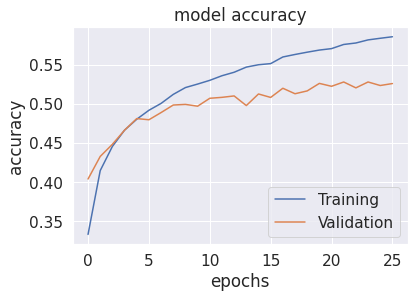

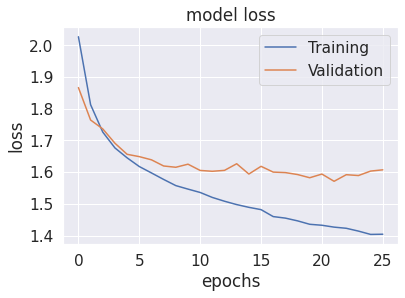

In [63]:
plt.figure()
plt.plot(overfitting_hist.history['accuracy'])
plt.plot(overfitting_hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['Training','Validation'])

plt.figure()
plt.plot(overfitting_hist.history['loss'])
plt.plot(overfitting_hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Training','Validation'])
# darker color graph is train metric and lighter color graph is validation metric

In [64]:
print("The total time taken for training: {}s".format(round(end_time - start_time, 2)))

The total time taken for training: 634.99s


### 4. Model Evaluation(0.5 + 0.5 = 1 mark)

#### a. Print the final train and validation loss and accuracy. Print confusion matrix and classification report for the validation dataset. Analyse and report the best and worst performing class.

In [65]:
train_predicted = model3.predict(train_gen)
valid_predicted = model3.predict(valid_gen)

In [66]:
train_predicted_cls = np.argmax(train_predicted,axis=1)
valid_predicted_cls = np.argmax(valid_predicted, axis=1) 

In [67]:
train_actual_cls = np.argmax(y_train, axis=1)
valid_actual_cls = np.argmax(y_valid, axis=1)

In [68]:
print("Train Accuracy: {}%".format(round(accuracy_score(train_actual_cls, train_predicted_cls)*100.0, 2)))
print("Validation Accuracy: {}%".format(round(accuracy_score(valid_actual_cls, valid_predicted_cls)*100.0,2)))

Train Accuracy: 59.56%
Validation Accuracy: 52.16%


In [69]:
print(classification_report(valid_actual_cls, valid_predicted_cls))

              precision    recall  f1-score   support

           0       0.61      0.54      0.57      1000
           1       0.60      0.64      0.62      1000
           2       0.40      0.49      0.44      1000
           3       0.36      0.42      0.39      1000
           4       0.46      0.41      0.44      1000
           5       0.48      0.28      0.35      1000
           6       0.54      0.56      0.55      1000
           7       0.59      0.61      0.60      1000
           8       0.66      0.62      0.64      1000
           9       0.56      0.63      0.59      1000

    accuracy                           0.52     10000
   macro avg       0.53      0.52      0.52     10000
weighted avg       0.53      0.52      0.52     10000



In [70]:
cfm = confusion_matrix(valid_actual_cls, valid_predicted_cls, normalize='true')

In [71]:
df_cm = pd.DataFrame(cfm, index = class_names, columns=class_names)

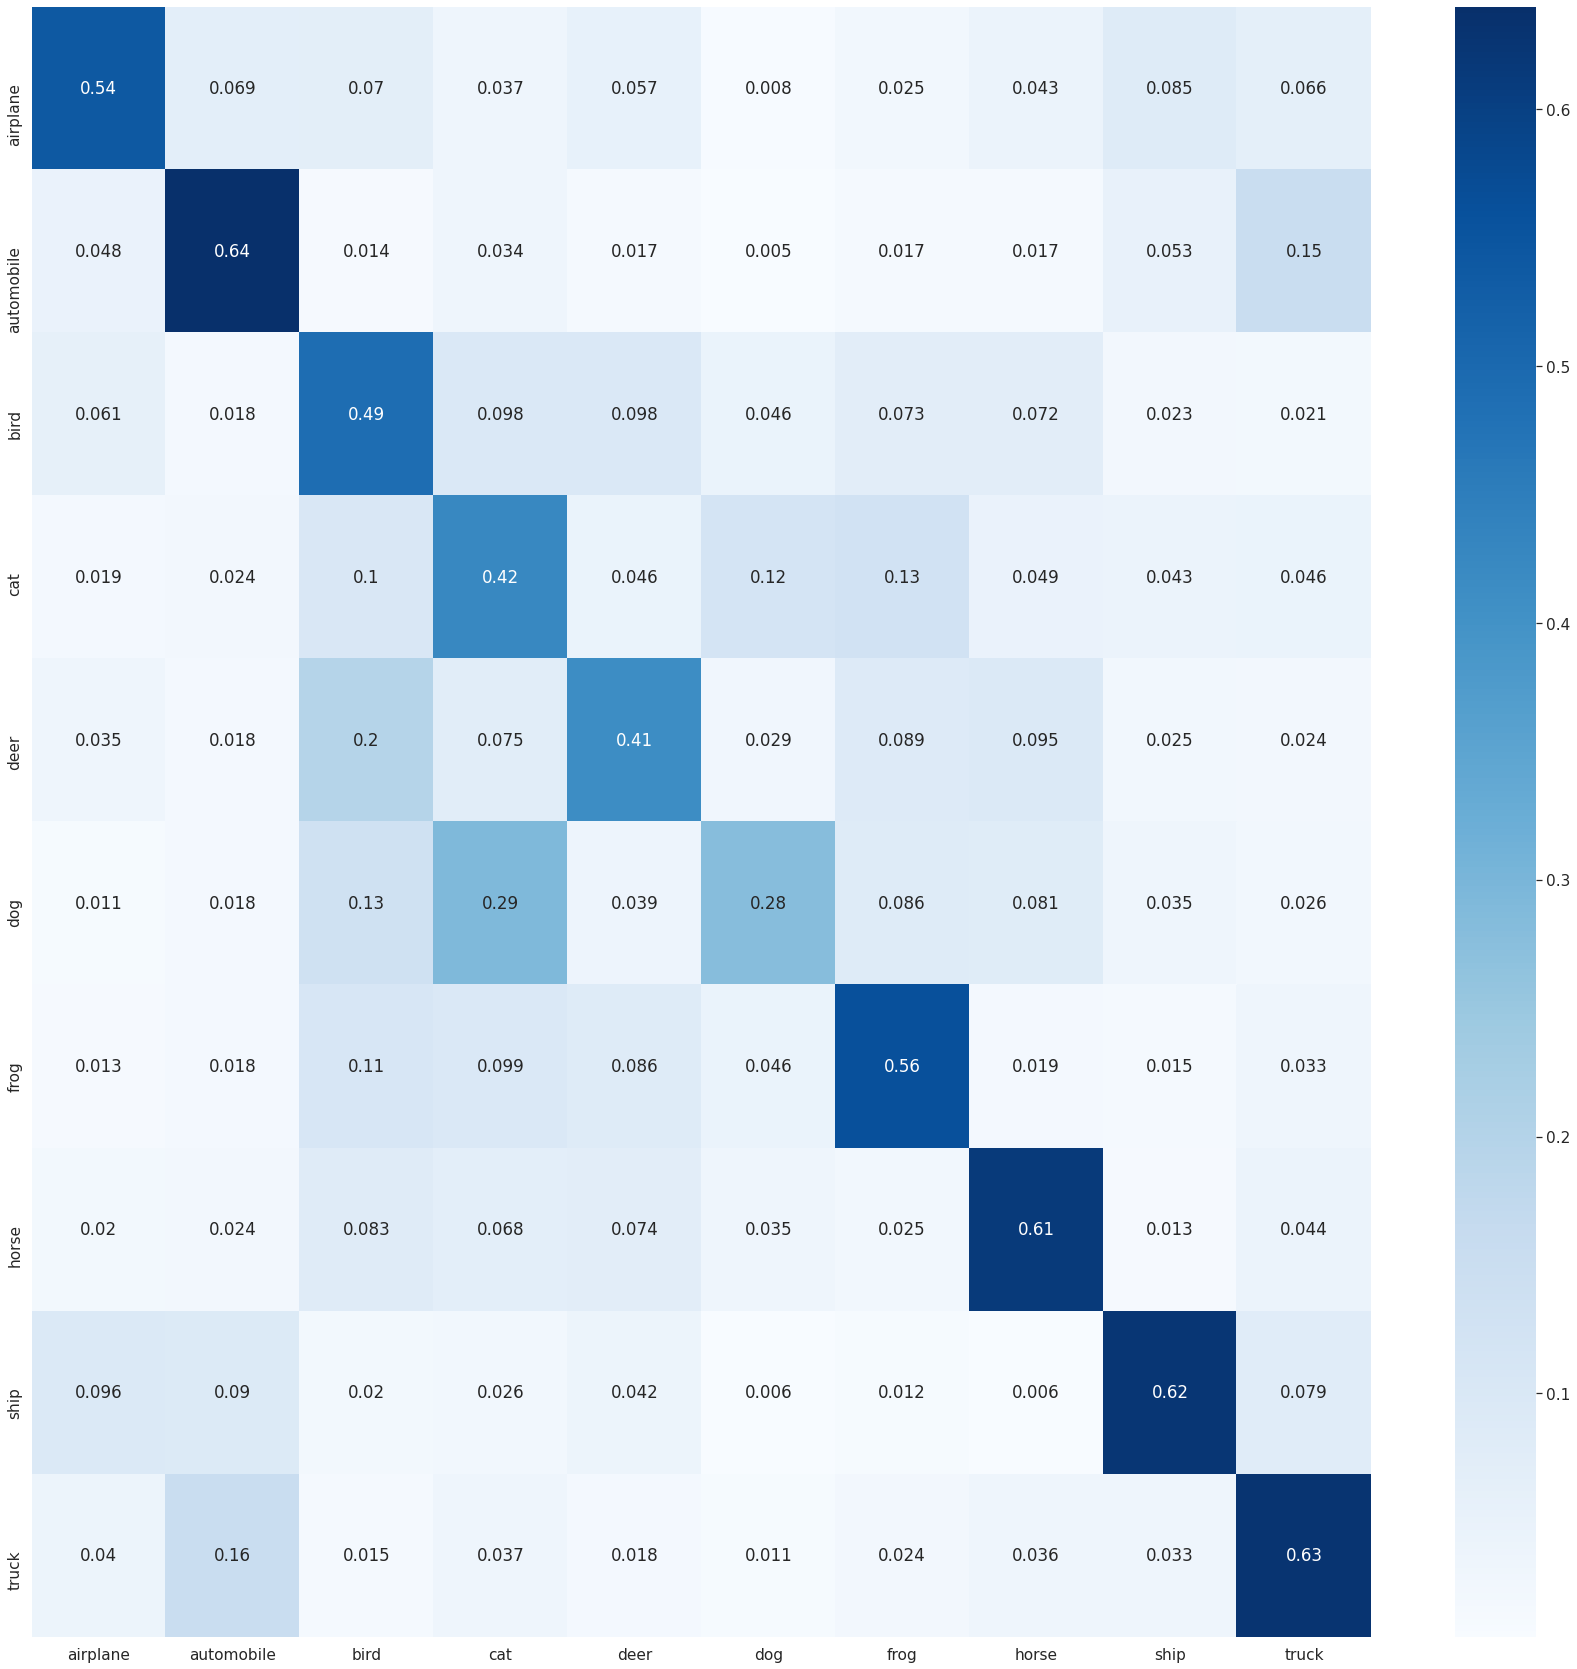

In [72]:
plt.figure(figsize=(30,30))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, cmap=plt.get_cmap('Blues')) # font size

plt.show()

### Analysis of Heatmap
For the validation dataset, amongst the classes, model has learnt to classify automobile better than other classes as it could identify ~64% of automobile data in validation set, the next best are truck and ship. The worst classified class is dog, amongst the dog images present in validation set, it has properly classified only ~28% of them. It has mostly classified dogs as cats which is totally wrong! 

#### b. Print the two most incorrectly classified images for each class in the test dataset.

In [73]:
test_gen = generator.flow(X_test, y_test, batch_size=batch_size, shuffle=False)
test_predicted = model3.predict(test_gen)
test_actual_cls = np.argmax(y_test, axis=1)

In [74]:
def find_2_smallest_index(arr):
    first = 999
    second = 999
    first_index=0
    sexond_index=0
    for i in range(len(arr)):
        if arr[i] < first:
            second = copy.deepcopy(first)
            second_index = copy.deepcopy(first_index)
            first = copy.deepcopy(arr[i])
            first_index = copy.deepcopy(i)
        elif (arr[i] < second):
            second = copy.deepcopy(arr[i])
            second_index = copy.deepcopy(i)
    return first_index, second_index
            

In [75]:
worst_2 = {}
for i in range(10):
    first_index, second_index = find_2_smallest_index(test_predicted[:,i])
    worst_2[i] = [X_test[first_index],X_test[second_index]]

#########################################################
  Printing top 2 worst classified images of each class   
#########################################################


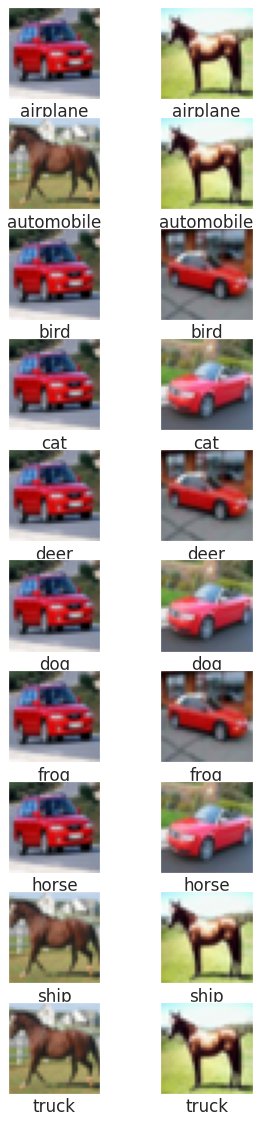

In [76]:
print("#########################################################")
print("  Printing top 2 worst classified images of each class   ")
print("#########################################################")

display_image(worst_2)

# Analysis of moving the dropout layer
By introducing the noise in data, we would ideally like to see if data is being modeled better, this has reduced the overiting but by a small value. It can be better to have more than one dropout layers. In general, it is better to have dropout layers after having layer with non-linear activation functions!

# References


1. Sashank J. Reddi, Satyen Kale, & Sanjiv Kumar. (2019). On the Convergence of Adam and Beyond.
2. Srivastava, Nitish, Geoffrey, Hinton, Alex, Krizhevsky, Ilya, Sutskever, and Ruslan, Salakhutdinov. "Dropout: A Simple Way to Prevent Neural Networks from Overfitting".J. Mach. Learn. Res. 15, no.1 (2014): 1929–1958.
3. "Is Dropout Applied before or after the Non-linear Activation Function?" Dr. Sebastian Raschka. May 19, 2021. Accessed May 23, 2021. https://sebastianraschka.com/faq/docs/dropout-activation.html.   
4. Franck DernoncourtFranck Dernoncourt "Where Should I Place Dropout Layers in a Neural Network?" Cross Validated. June 01, 1965. Accessed May 23, 2021. https://stats.stackexchange.com/questions/240305/where-should-i-place-dropout-layers-in-a-neural-network.
5. Galeone, Paolo. "Analysis of Dropout." P. Galeone's Blog. Accessed May 23, 2021. https://pgaleone.eu/deep-learning/regularization/2017/01/10/anaysis-of-dropout/.
6. Shen, Kevin. "Effect of Batch Size on Training Dynamics." Medium. June 19, 2018. Accessed May 23, 2021. https://medium.com/mini-distill/effect-of-batch-size-on-training-dynamics-21c14f7a716e.
7. Samuel L. Smith, , Pieter-Jan Kindermans, Chris Ying, and Quoc V. Le. "Don't Decay the Learning Rate, Increase the Batch Size." (2018).




